In [1]:
# https://teddylee777.github.io/scikit-learn/KNeighborsClassifier%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%B6%84%EB%A5%98%EA%B8%B0-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0

### Import Packages and Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### Iris 데이터 불러오기

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
len(iris.data)

150

### 두 개의 feature만 사용(Sepal length and width)할 경우 data plot 해보기

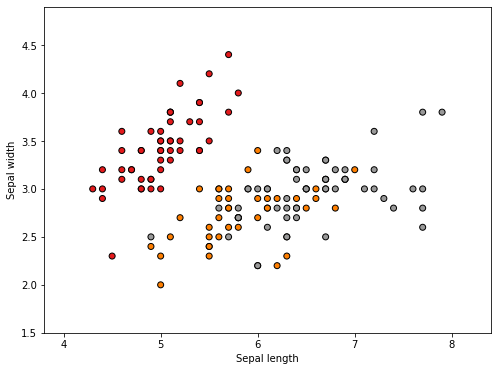

In [10]:
# here we only select sepal length and width (select first 2 columns)
X = iris.data[:, :2]
y = iris.target

# visualization을 위하여 각 축의 limit 설정
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.show()

### sklearn 라이브러리를 이용한 KNN 수행

In [11]:
# 필요한 library import
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
iris = load_iris()
X = iris.data[:, :2] # 훈련 데이터 (2개의 특징만 사용), 3개의 특징을 사용하고 싶은 경우 iris.data[:, :3], 4개의 특징을 모두 사용하고 싶은 경우 iris.data[:, :4]
y = iris.target

# 성능 측정을 위한 train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=30) # test_size: 테스트에 사용할 비율. 0 ~ 1.0 사이의 값

In [13]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(105, 2)
(105,)
(45, 2)
(45,)


In [14]:
clf = KNeighborsClassifier(n_neighbors=5) # k 값 설정 (n_neighbors)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
# test set에 대한 예측해보기
prediction = clf.predict(x_test)

In [16]:
# test set에 대한 예측 결과
prediction

array([1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1])

In [17]:
# test set의 정답
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [18]:
# 정확도 (accuracy)
(prediction==y_test).mean()

0.8

### 적절한 k value 찾아보기

In [19]:
# k값에 따른 정확도를 저장할 변수
#train_acc = []
test_acc = []

# k = 1 ~ 30 까지 각각 KNN 수행 및 정확도를 저장
limit = 30 # 수행할 k의 값 설정

for n in range(1,limit+1):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    #train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

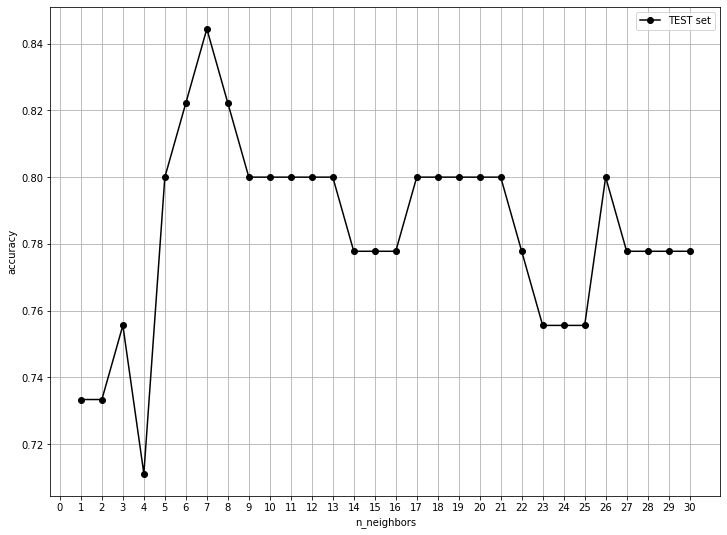

In [20]:
plt.figure(figsize=(12, 9))
#plt.plot(range(1, limit+1), train_acc, label='TRAIN set')
plt.plot(range(1, limit+1), test_acc, 'ko-', label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, limit+1, step=1))
plt.grid()
plt.legend()

### 성능 평가해보기 (confusion matrix, etc.)

In [21]:
clf = KNeighborsClassifier(n_neighbors=7) # k 값 설정 (n_neighbors)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
# test set에 대한 예측해보기
prediction = clf.predict(x_test)

In [23]:
# test set에 대한 예측 결과
prediction

array([1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1])

In [24]:
# test set의 정답
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [25]:
# 정확도 (accuracy)
(prediction==y_test).mean()

0.8444444444444444

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

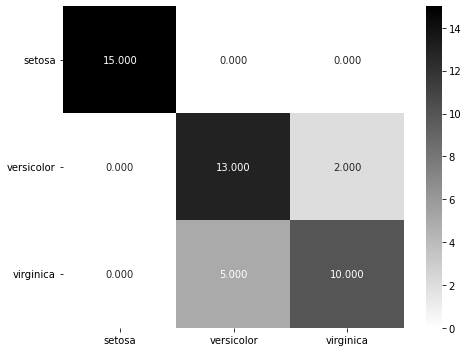

In [27]:
# confusion matrix 그리기
x_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, prediction)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [28]:
# precision, recall, F1
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.7222    0.8667    0.7879        15
           2     0.8333    0.6667    0.7407        15

    accuracy                         0.8444        45
   macro avg     0.8519    0.8444    0.8429        45
weighted avg     0.8519    0.8444    0.8429        45

